## Overview

There are many interesting mathematical questions connected with the design of chemical systems that are described by deterministic ODEs exhibiting various exotic dynamical phenomena (Plesa et al., 2016): **How do we construct a chemical system described by ODEs that undergo specific bifurcations, have multiple limit cycles or multiple fixed points? What types of reactions should we add to a given chemical system so that its behaviour changes in a desired way?** Such reaction network constructions are made more challenging by various constraints on their simplicity, where a simple
design means that it is easier to engineer the resulting chemical system in experiments.

In this section, we only study the problem of designing and redesigning reaction networks at the (more detailed) stochastic level.

## Production-Degradation Revisited
We now redesign a chemical reaction system to reproduce the dynamics of the following system,`Fst`:
$$
\emptyset \stackrel{k_{1}}{\longrightarrow} A \stackrel{k_{2}}{\longrightarrow} \emptyset
$$
Now, consider a new system, named as `Sec`:
$$
\begin{array}{ll}{A \stackrel{k_{1}}{\longrightarrow} B,} & {B+C \stackrel{k_{2}}{\longrightarrow} A+C} \\ {\emptyset \stackrel{k_{3}}{\longrightarrow} C,} & {B+C \stackrel{k_{4}}{\longrightarrow} B}\end{array}
$$
The production rate is constant in `Fst`, but it is, on the face of it, non-constant in `Sec`. **It is the third and the fourth reactions in `Sec` that make this rate approximately constant.**

### ODEs for the new system
$$
\begin{aligned} \frac{\mathrm{d} a}{\mathrm{d} t} &=-k_{1} a+k_{2} b c \\ \frac{\mathrm{d} b}{\mathrm{d} t} &=k_{1} a-k_{2} b c \\ \frac{\mathrm{d} c}{\mathrm{d} t} &=k_{3}-k_{4} b c \end{aligned}
$$
and translating this into the number of molecules of A,B, and C gives:
$$
\begin{aligned} \frac{\mathrm{d} \bar{A}}{\mathrm{d} t} &=-k_{1} \bar{A}+\frac{k_{2}}{v} \bar{B} \bar{C} \\ \frac{\mathrm{d} \bar{B}}{\mathrm{d} t} &=k_{1} \bar{A}-\frac{k_{2}}{v} \bar{B} \bar{C} \\ \frac{\mathrm{d} \bar{C}}{\mathrm{d} t} &=k_{3} v-\frac{k_{4}}{v} \bar{B} \bar{C} \end{aligned}
$$
where $\bar{A}(t)=a(t) v, \bar{B}(t)=b(t) v$ and $\bar{C}(t)=c(t) v$. Adding the first two eqns, we have:
$$
\frac{\mathrm{d}}{\mathrm{d} t}(\bar{A}+\bar{B})=0
$$
So
$$
\bar{A}(t)+\bar{B}(t)=N, \quad \text { for all } t \geq 0
$$
Where $N=\bar{A}(0)+\bar{B}(0)$. Now the ODEs become:
$$
\begin{array}{l}{\frac{\mathrm{d} \bar{A}}{\mathrm{d} t}=-k_{1} \bar{A}+\frac{k_{2}}{v}(N-\bar{A}) \bar{C}} \\ {\frac{\mathrm{d} \bar{C}}{\mathrm{d} t}=k_{3} v-\frac{k_{4}}{v}(N-\bar{A}) \bar{C}}\end{array}
$$
Let us now assume that $k_{3} v=k_{4} / v$, then:
$$
\frac{1}{k_{3} v} \frac{\mathrm{d} \bar{C}}{\mathrm{d} t}=1-(N-\bar{A}) \bar{C}
$$
In particular, considering the limit $k_{3} v \rightarrow \infty,$ we have
$$
1 \approx(N-\bar{A}) \bar{C} .
$$
Thus, we get:
$$
\frac{\mathrm{d} \bar{A}}{\mathrm{d} t}=-k_{1} \bar{A}+\frac{k_{2}}{v}
$$
Which is similar to what we have for `Fst` system.

### Add more noises

We now introduce two additional reactions given as:
$$
A+B \stackrel{k_{5}}{\longrightarrow} 2 A, \quad A+B \stackrel{k_{5}}{\longrightarrow} 2 B
$$
**since we use the same rate constant $k_{5}$ in both reactions in these additional reactions do not change the deterministic model. It is still given by ODEs** The total contribution of both reactions on the right-hand side of the reations above is $k_{5} a b-k_{5} a b=0$. **In particular, all results of the above deterministic
ODE-based analysis of chemical system `Sec` also hold.**

**However, the stochastic simulation of this new system yields qualitatively different results.** To explain this qualitative change in the behaviour of a stochastic model, consider the propensity function of reactions in the equations above. For both equations, it is $k_{5} A(t) B(t) .$ This propensity is zero if $A(t)=0$ or $A(t)=N$. If $A(t) \neq N,$ the propensity can take arbitrarily large values, if we increase $k_{5}.$ In particular, the state of the system has a tendency to rapidly change when $A(t) \neq 0$ and $A(t) \neq N .$ **This biases the observed behaviour towards states when $A(t)=0$ or $A(t)=N .$ If we allow higher-order reactions, then we can generalize this idea in such a
way that we can add noise to an arbitrary part of the state space.**

## Implementation of the first new system

In [5]:
import numpy as np
from numpy.random import uniform

def firstNew(k1,k2,k3,k4,v,T,arr):
    tlst = [0]
    a,b,c=arr
    cts ={'A':[a],'B':[b],'C':[c]}
    al3 = k3*v
    responds = {0:[-1,+1,0],1:[1,-1,0],2:[0,0,1],3:[0,0,-1]}
    while tlst[-1]<T:
        
        if a>0:
            al1 = a*k1
        else:
            al1 = 0
        if b>0 and c>0:
            al2 = b*c*k2/v
            al4 = b*c*k4/v
        else:
            al2=0
            al4=0
        al = al1+al2+al3+al4
        plst = np.cumsum([al1,al2,al3,al4])/al
        r1,r2 = uniform(size=2)
        tau = 1/al*np.log(1/r1)
        tlst.append(tlst[-1]+tau)
        da,db,dc = responds[sum(plst<r2)]
        a+=da
        b+=db
        c+=dc
        cts['A'].append(a)
        cts['B'].append(b)
        cts['C'].append(c)
    return tlst,cts

In [6]:
K1,K2,K3,K4,V=0.1,1,100,100,1
arr0 = [0,20,0]
Tscal = 100
simt,simc=firstNew(K1,K2,K3,K4,V,Tscal,arr0)

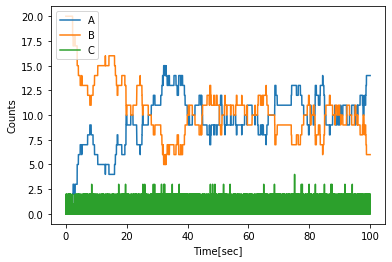

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(simt,simc['A'],'-',label='A')
plt.plot(simt,simc['B'],'-',label='B')
plt.plot(simt,simc['C'],'-',label='C')
plt.xlabel('Time[sec]')
plt.ylabel('Counts')
plt.legend(loc='upper left')

## Implementation of the first new system + noises

**Here, we add the following two equations:**
$$
A+B \stackrel{k_{5}}{\longrightarrow} 2 A, \quad A+B \stackrel{k_{5}}{\longrightarrow} 2 B
$$

In [33]:
def noiseNew(k1,k2,k3,k4,k5,v,T,arr):
    tlst = [0]
    a,b,c=arr
    cts ={'A':[a],'B':[b],'C':[c]}
    al3 = k3*v
    responds = {0:[-1,+1,0],1:[1,-1,0],2:[0,0,1],
                3:[0,0,-1],4:[1,-1,0],5:[-1,1,0]}
    while tlst[-1]<T:
        
        if a>0:
            al1 = a*k1
        else:
            al1 = 0
        if b>0 and c>0:
            al2 = b*c*k2/v
            al4 = b*c*k4/v
        else:
            al2=0
            al4=0
        if a>0 and b>0:
            al5 = a*b*k5/v
            al6 = al5
        else:
            al5=0
            al6 = al5
        al = al1+al2+al3+al4+al5+al6
        plst = np.cumsum([al1,al2,al3,al4,al5,al6])/al
        r1,r2 = uniform(size=2)
        tau = 1/al*np.log(1/r1)
        tlst.append(tlst[-1]+tau)
        da,db,dc = responds[sum(plst<r2)]
        a+=da
        b+=db
        c+=dc
        cts['A'].append(a)
        cts['B'].append(b)
        cts['C'].append(c)
    return tlst,cts

In [34]:
K1,K2,K3,K4,K5,V=0.1,1,100,100,100,1
arr0 = [0,20,0]
Tscal = 100
simt,simc=noiseNew(K1,K2,K3,K4,K5,V,Tscal,arr0)

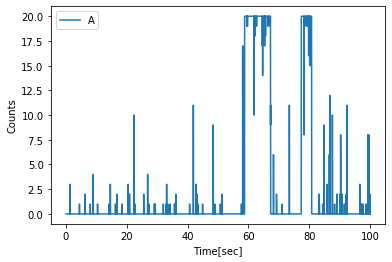

In [35]:
plt.plot(simt,simc['A'],'-',label='A')
#plt.plot(simt,simc['B'],'-',label='B')
#plt.plot(simt,simc['C'],'-',label='C')
plt.xlabel('Time[sec]')
plt.ylabel('Counts')
plt.legend(loc='upper left')

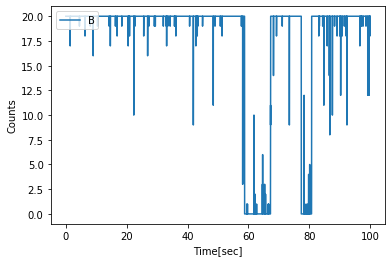

In [36]:
plt.plot(simt,simc['B'],'-',label='B')
#plt.plot(simt,simc['C'],'-',label='C')
plt.xlabel('Time[sec]')
plt.ylabel('Counts')
plt.legend(loc='upper left')

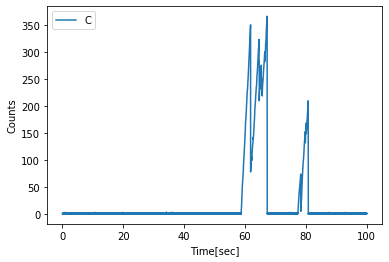

In [37]:
plt.plot(simt,simc['C'],'-',label='C')
plt.xlabel('Time[sec]')
plt.ylabel('Counts')
plt.legend(loc='upper left')

Text(0, 0.5, 'Counts')

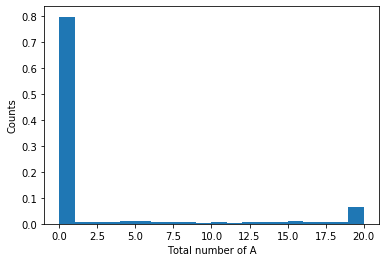

In [41]:
plt.hist(np.array(simc['A']),20,density=True)
plt.xlabel('Total number of A')
plt.ylabel('Counts')

**Let's change $k_5$**

Text(0, 0.5, 'Counts')

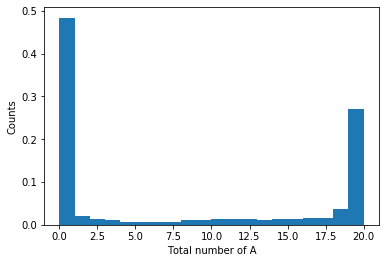

In [42]:
K5=1
simt,simc=noiseNew(K1,K2,K3,K4,K5,V,Tscal,arr0)
temp = np.array(simc['A'])
plt.hist(temp,20,density=True)
plt.xlabel('Total number of A')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

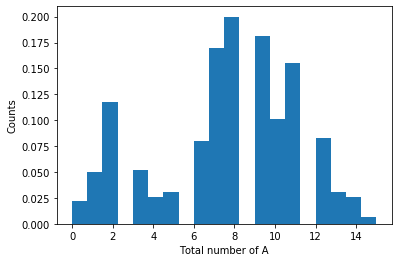

In [43]:
K5=0
simt,simc=noiseNew(K1,K2,K3,K4,K5,V,Tscal,arr0)
temp = np.array(simc['A'])
plt.hist(temp,20,density=True)
plt.xlabel('Total number of A')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

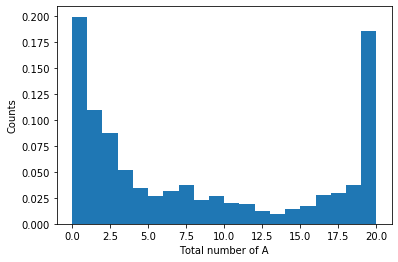

In [44]:
K5=0.1
simt,simc=noiseNew(K1,K2,K3,K4,K5,V,Tscal,arr0)
temp = np.array(simc['A'])
plt.hist(temp,20,density=True)
plt.xlabel('Total number of A')
plt.ylabel('Counts')